In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [6]:
# Leer los archivos de datos con las horas 00Z y 12Z
# Convertirtiendo la columna CAPE que está como objeto a número

#Primero con 12Z
df12 = pd.read_csv("df2017CAPE_PW_12Z.csv", header=None, names=['Date', 'CAPE', 'PW'])
df12.CAPE=pd.to_numeric(df12.CAPE, errors='coerce')
df12.head() 

,Date,CAPE,PW
0,01 01 2017,0.00,6.84
1,02 01 2017,22.86,8.76
2,07 01 2017,0.00,8.46
3,09 01 2017,90.27,12.74
4,11 01 2017,0.00,6.68


In [11]:
#Luego con 00Z
df00 = pd.read_csv("df2017CAPE_PW_00Z.csv", header=None, names=['Date', 'CAPE', 'PW'])
df00.CAPE=pd.to_numeric(df00.CAPE, errors='coerce')
df00.head()

,Date,CAPE,PW
0,01 01 2017,0.0,6.48
1,08 01 2017,0.0,3.52
2,09 01 2017,0.0,6.92
3,10 01 2017,0.0,4.09
4,12 01 2017,0.0,5.98


In [12]:
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDate'

#Con 12Z
df12['Ndate'] = pd.to_datetime(df12['Date'], format='%d %m %Y')
df12['month'] = df12['Ndate'].dt.month
df12.head()

,Date,CAPE,PW,Ndate,month
0,01 01 2017,0.00,6.84,2017-01-01,1
1,02 01 2017,22.86,8.76,2017-01-02,1
2,07 01 2017,0.00,8.46,2017-01-07,1
3,09 01 2017,90.27,12.74,2017-01-09,1
4,11 01 2017,0.00,6.68,2017-01-11,1


In [14]:
#Con 00Z
#
df00['Ndate'] = pd.to_datetime(df00['Date'], format='%d %m %Y')
df00['month'] = df00['Ndate'].dt.month
df00.head()

,Date,CAPE,PW,Ndate,month
0,01 01 2017,0.0,6.48,2017-01-01,1
1,08 01 2017,0.0,3.52,2017-01-08,1
2,09 01 2017,0.0,6.92,2017-01-09,1
3,10 01 2017,0.0,4.09,2017-01-10,1
4,12 01 2017,0.0,5.98,2017-01-12,1


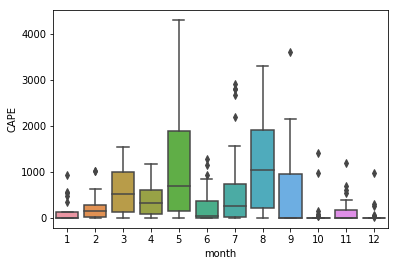

In [17]:
# graficar Boxplots por mes usando la Biblioteca Seaborn. Para eso vamos a tener que importar las bibliotecas primero.
# Primero vamos a graficar CAPE:
#
#Con 12Z
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="CAPE", data=df12)
plt.show()

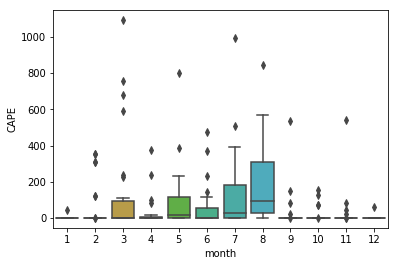

In [19]:
#Con 00Z
#
ax = sns.boxplot(x="month", y="CAPE", data=df00)
plt.show()

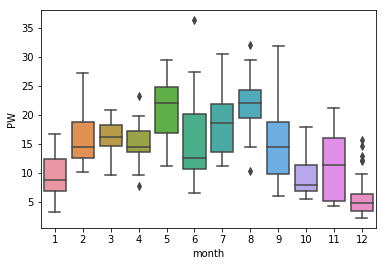

In [24]:
# graficar Boxplots por mes usando la Biblioteca Seaborn.
# Vamos a graficar la PRECIPITACIÓN
#
# Con 12Z
plt.show()
ax = sns.boxplot(x="month", y="PW", data=df12)

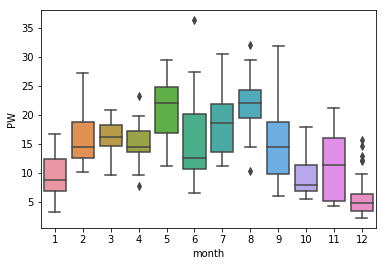

In [25]:
# Con 00Z
#
plt.show()
ax = sns.boxplot(x="month", y="PW", data=df00)

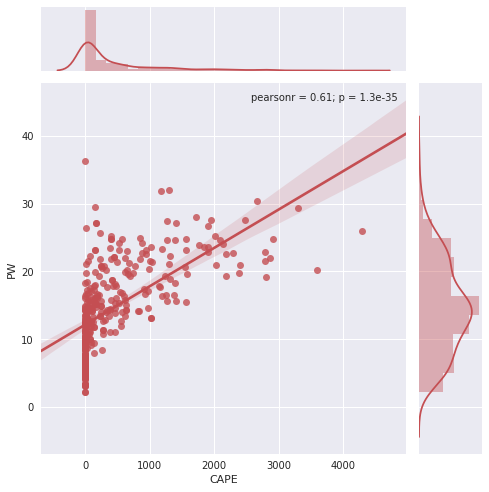

In [32]:
#Ahora vamos a graficar con otro tipo de gráfica, pero que sigue siendo de la biblioteca Seaborn
# Esta gráfica es de correlación, si está relacionada CAPE con el agua precipitada
# Mi relación "r"=0.61 y muestra una relación lineal, si el agua CAPE crece, el agua precipitada crece.
#
#Con 12Z
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("CAPE", "PW", data=df12, kind="reg",
                   color="r", size=7)
plt.show(g)

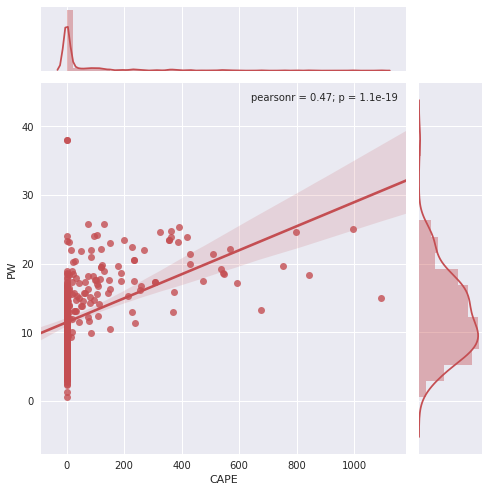

In [34]:
#Con 00Z
#
# Mi relación "r"=0.41, también es una relación lineal, cuando CAPE crece, también lo hace la precipitación.
#
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("CAPE", "PW", data=df00, kind="reg",
                   color="r", size=7)
plt.show(g)

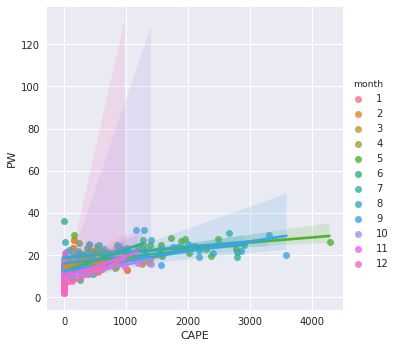

In [36]:
#Con 12Z
#
# Es un modelo de regresión lineal en todo el año, está viendo si puedes escribir el agua precipitable es una función
#lineal del CAPE.
#
#Si puede hacerse pero no tiene sentido.
#
g = sns.lmplot(x="CAPE", y="PW", hue="month",
               truncate=True, size=5, data=df12)
plt.show(g)

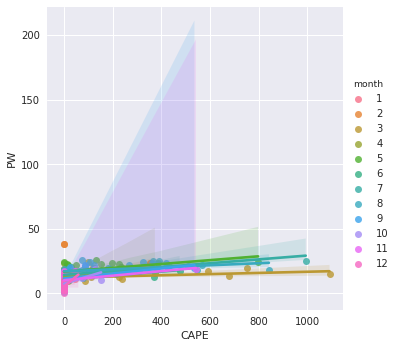

In [37]:
#Con 00Z
g = sns.lmplot(x="CAPE", y="PW", hue="month",
               truncate=True, size=5, data=df00)
plt.show(g)